# ANÁLISIS DE  DATOS  DEL COVID-19 EN LOS MUNICIPIOS DE SOLOLÁ DEL 13-02-2020 al 26-05-2021

In [753]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# SINTOMAS CONFIRMADOS POR MUNICIPIO, FECHA DEL 13-02-2020 al 26-05-2021


## Sintomas

In [754]:
InicioSintoma = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/Inicio de síntomas.csv")
InicioSintoma.head()

,departamento,codigo_departamento,municipio,codigo_municipio,poblacion,2020-04-05,2020-04-08,2020-04-10,2020-04-13,2020-04-20,...,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-25
0,SOLOLA,7,CONCEPCION,708,7105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SOLOLA,7,NAHUALA,705,91523,0,0,0,0,0,...,0,2,0,0,0,1,0,1,0,2
2,SOLOLA,7,PANAJACHEL,710,15840,0,0,0,0,0,...,3,0,0,1,0,0,0,0,0,0
3,SOLOLA,7,SAN ANDRES SEMETABAJ,709,14640,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,SOLOLA,7,SAN ANTONIO PALOPO,712,15639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Se puede observar los datos impresos del archivo "Inicio de síntomas.csv"

### Verificar columnas y nombres del archivo

In [755]:
InicioSintoma.columns.values

array(['departamento', 'codigo_departamento', 'municipio',
       'codigo_municipio', 'poblacion', '2020-04-05', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-27', '2020-04-28', '2020-04-30',
       '2020-05-04', '2020-05-06', '2020-05-08', '2020-05-09',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-18', '2020-05-19', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-29', '2020-06-02', '2020-06-07',
       '2020-06-11', '2020-06-13', '2020-06-15', '2020-06-16',
       '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
       '2020-06-24', '2020-06-26', '2020-06-28', '2020-06-29',
       '2020-06-30', '2020-07-03', '2020-07-05', '2020-07-06',
       '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
       '2020-07-16', '2020-07-17', '2020-07-18', '2020

* En este apartado se puede notar las columnas o encabezados del archivo "Inicio de síntomas.csv"
* por tener datos grandes no se puede visualizar algunos datos para estar seguro que python este leyendo la información se impliemntta el siguiente código "nomnre_del_archivo.columns.values"

## Total de sintomas 

In [756]:
InicioSintoma = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/Inicio de síntomas.csv")
TotalInicioSintoma=InicioSintoma
TotalInicioSintoma.drop(['departamento','codigo_departamento','codigo_municipio'], axis = 'columns', inplace=True)
# np.sum(TotalInicioSintoma,axis=1)#suma de reglones en una matriz

TotalInicioSintoma.loc[:,'Total_Sintoma']=TotalInicioSintoma.sum(axis=1)
TotalInicioSintoma.head()

,municipio,poblacion,2020-04-05,2020-04-08,2020-04-10,2020-04-13,2020-04-20,2020-04-21,2020-04-22,2020-04-27,...,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-25,Total_Sintoma
0,CONCEPCION,7105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,NAHUALA,91523,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,1,0,2,182
2,PANAJACHEL,15840,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,423
3,SAN ANDRES SEMETABAJ,14640,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,84
4,SAN ANTONIO PALOPO,15639,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


* Se puede observar los datos impresos de las columnas municipio y las fecha de inicio de síntomas del 2020-02-13 al 2021-05-26
* Asi mismo se agregó una nueva columna "Total Sintoma"  se hizo sumatoria de los reglones de todas fechas es decir la totalidad  de los sintomas de cada ciudadano por municipio 

In [987]:
# Extraer más de una columna para un subconjunto
sintoma = TotalInicioSintoma[["municipio","poblacion", "Total_Sintoma"]]
sintoma.head(20)

,municipio,poblacion,Total_Sintoma
0,CONCEPCION,7105,2
1,NAHUALA,91523,182
2,PANAJACHEL,15840,423
3,SAN ANDRES SEMETABAJ,14640,84
4,SAN ANTONIO PALOPO,15639,13
5,SAN JOSE CHACAYA,5128,34
6,SAN JUAN LA LAGUNA,13123,71
7,SAN LUCAS TOLIMAN,31581,114
8,SAN MARCOS LA LAGUNA,2911,3
9,SAN PABLO LA LAGUNA,7950,4


## Gráfica de Barras de Sintomas por municipio 

Text(0.5, 1.0, 'SINTOMAS POR MUNICIPIO')

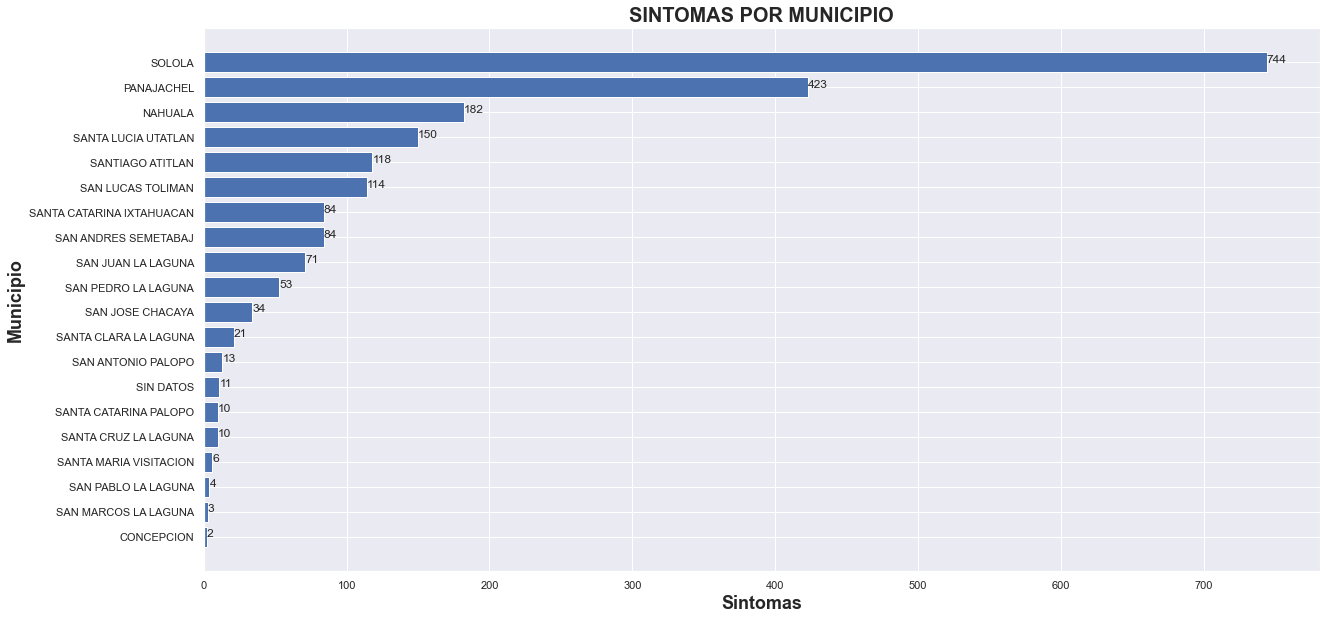

In [993]:
sns.set_theme(color_codes=True)

fig = plt.subplots(figsize=(20,10))
# sintoma.sort_values('Total_Sintoma', inplace=True)
sintoma.Total_Sintoma.sort_values(ascending=False)
plt.barh(sintoma.municipio, sintoma.Total_Sintoma)
for Y, X in enumerate(sintoma.Total_Sintoma):
    plt.annotate("{:,}".format(X), xy=(X,Y))

plt.xlabel("Sintomas", fontsize=18, weight="bold")
plt.ylabel("Municipio", fontsize=18, weight="bold")
plt.title("SINTOMAS POR MUNICIPIO", fontsize=20, weight="bold")

* Se puede visualizar en la gráfica de barras que los sintomas de COVID-19 el municipio de Sololá, Panajachel, Nahuala, Santa Lucia Utalan,Santiago Atitlán y San Lucas Toliman son los lugares con un rango de  114 a 744.
* Y el resto de municipios tienen bajo rango no pasa de los 100 ciudadanos con inico de sintomas

## Resumen Estadistico

In [1020]:
sintoma.describe()

,Total_Sintoma
count,20.000000
mean,106.850000
std,179.294605
min,2.000000
25%,10.000000
50%,43.500000
75%,115.000000
max,744.000000


* count es el número de datos contados que no están en blanco
* mean promedio o media
* std desviasión estándar
* min valor mínimo
* cuantiles 25-10, 50-43, 75-115 
* max es el valor máximo en un datos

# CASOS CONFIRMADOS POR MUNICIPIO, FECHA DEL 13-02-2020 al 26-05-2021

## CASOS 

In [799]:
casos=pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/casos.csv")
casos.drop(['V1','departamento','codigo_municipio'], axis = 'columns', inplace=True)
casos.head(20)

,municipio,casos,poblacion
0,CONCEPCION,4,7105
1,NAHUALA,287,91523
2,PANAJACHEL,534,15840
3,SAN ANDRES SEMETABAJ,109,14640
4,SAN ANTONIO PALOPO,25,15639
5,SAN JOSE CHACAYA,45,5128
6,SAN JUAN LA LAGUNA,98,13123
7,SAN LUCAS TOLIMAN,177,31581
8,SAN MARCOS LA LAGUNA,6,2911
9,SAN PABLO LA LAGUNA,8,7950


* Se puede observar los datos impresos de las columnas municipio y las fecha de casos del 2020-02-13 al 2021-05-26

## Gráfica de Barras de Casos por Municipio 

Text(0.5, 1.0, 'CASOS POR MUNICIPIO')

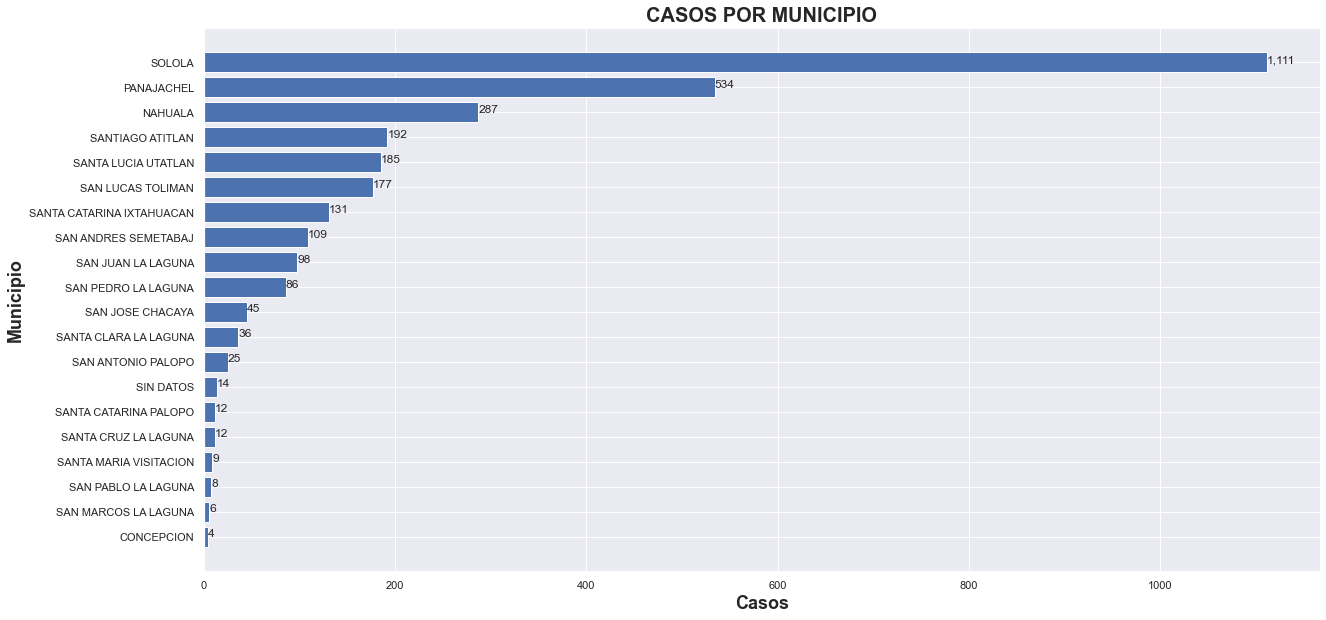

In [800]:
fig = plt.subplots(figsize=(20,10))
casos.sort_values('casos', inplace=True)
# casos.casos.sort_values(ascending=True)
plt.barh(casos.municipio, casos.casos)
for Y, X in enumerate(casos.casos):
    plt.annotate("{:,}".format(X), xy=(X,Y))

plt.xlabel("Casos", fontsize=18, weight="bold")
plt.ylabel("Municipio", fontsize=18, weight="bold")
plt.title("CASOS POR MUNICIPIO", fontsize=20, weight="bold")

* Se analiza la totalidad de toma de muestras en el departamento de Sololá por cada municipio se observa en la gráfica de barras; Sololá, Panajachel, Nahuala un rango de 250 a 1120 ya que estas son las mas destacadas por el numero de casos. Mientras que el resto los municipios tienen un rango de 200 para bajo.

## Resumen Estadistico

In [805]:
casos.describe()

,casos,poblacion
count,20.00000,20.00000
mean,154.05000,23363.30000
std,259.58519,28680.15868
min,4.00000,0.00000
25%,12.00000,6610.75000
50%,65.50000,12361.50000
75%,179.00000,24166.50000
max,1111.00000,98886.00000


* count es el número de datos contados que no están en blanco
* mean promedio o media
* std desviasión estándar
* min valor mínimo
* cuantiles 25-12, 50-65, 75-179
* max es el valor máximo en un datos

# FALLECIDOS CONFIRMADOS POR MUNICIPIO, FECHA DEL 13-02-2020 al 26-05-2021

## Fallecidos

In [875]:
fallecidos = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/Fallecidos.csv")
fallecidos.drop(['codigo_municipio','departamento'], axis = 'columns', inplace=True)
fallecidos.head(20)

,municipio,fallecidos,poblacion
0,CONCEPCION,0,7105
1,NAHUALA,18,91523
2,PANAJACHEL,21,15840
3,SAN ANDRES SEMETABAJ,9,14640
4,SAN ANTONIO PALOPO,2,15639
5,SAN JOSE CHACAYA,7,5128
6,SAN JUAN LA LAGUNA,3,13123
7,SAN LUCAS TOLIMAN,8,31581
8,SAN MARCOS LA LAGUNA,1,2911
9,SAN PABLO LA LAGUNA,0,7950


## Gráfica de Barras de Fallecidos por Municipio 

Text(0.5, 1.0, 'FALLECIDOS POR MUNICIPIO')

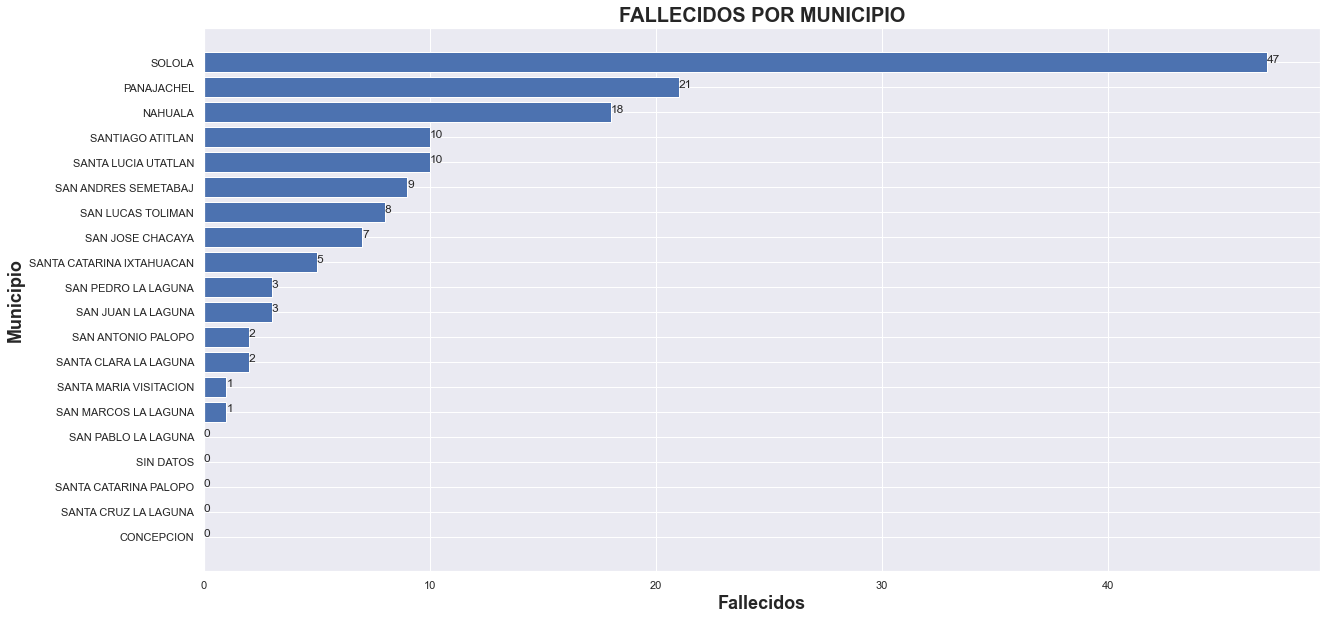

In [876]:
fig = plt.subplots(figsize=(20,10))
fallecidos.sort_values('fallecidos', inplace=True)
# casos.casos.sort_values(ascending=True)
plt.barh(fallecidos.municipio, fallecidos.fallecidos)
for Y, X in enumerate(fallecidos.fallecidos):
    plt.annotate("{:,}".format(X), xy=(X,Y))

plt.xlabel("Fallecidos", fontsize=18, weight="bold")
plt.ylabel("Municipio", fontsize=18, weight="bold")
plt.title("FALLECIDOS POR MUNICIPIO", fontsize=20, weight="bold")

* En el minucipio de Sololá, Panajchel y Nahualá hay un porcetaje mayor al resto entre las muertes a causa  del COVID-19 desde la fecha 2020-02-13 al 2021-05-26.
* También se observa que el municipio de San Marcos La Laguna, Santa Maria Visitación, San Juan La Laguna y San Antonio Palopo tiene un porcentaje mínimo de fallecidos esto dá entender que quizá haya un buen protocolo de cuidados por la municipalidad o por los mismo ciudadanos. 

## Resumen Estadistico

In [877]:
fallecidos.describe()

,fallecidos,poblacion
count,20.000000,20.00000
mean,7.350000,23363.30000
std,11.098957,28680.15868
min,0.000000,0.00000
25%,0.750000,6610.75000
50%,3.000000,12361.50000
75%,9.250000,24166.50000
max,47.000000,98886.00000


* count es el número de datos contados que no están en blanco
* mean promedio o media
* std desviasión estándar
* min valor mínimo
* cuantiles 25-0.75, 50-3, 75-9 
* max es el valor máximo en un datos

# VACUNADOS CONFIRMADOS POR MUNICIPIO

In [994]:
vacunados = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/vacunados.csv")
vacunados.drop(['V1'], axis = 'columns', inplace=True)
vacunados.head()

,municipio,departamento,poblacion,Vacunados_con_primera_dosis,Porcentaje_con_primera_dosis,Vacunados_con_esquema_completo,Porcentaje_con_esquema_completo
0,CONCEPCIÓN,SOLOLA,3927,33,0.8,11,0.3
1,NAHUALÁ,SOLOLA,56777,692,1.2,299,0.5
2,PANAJACHEL,SOLOLA,10694,560,5.2,181,1.7
3,SAN ANDRÉS SEMETABAJ,SOLOLA,9047,261,2.9,54,0.6
4,SAN ANTONIO PALOPÓ,SOLOLA,9563,109,1.1,29,0.3


## Gráfica de Barras  sobre los Vacunados Primera Dosis por Municipio

Text(0.5, 1.0, 'VACUNADOS PRIMERA DOSIS POR MUNICIPIO')

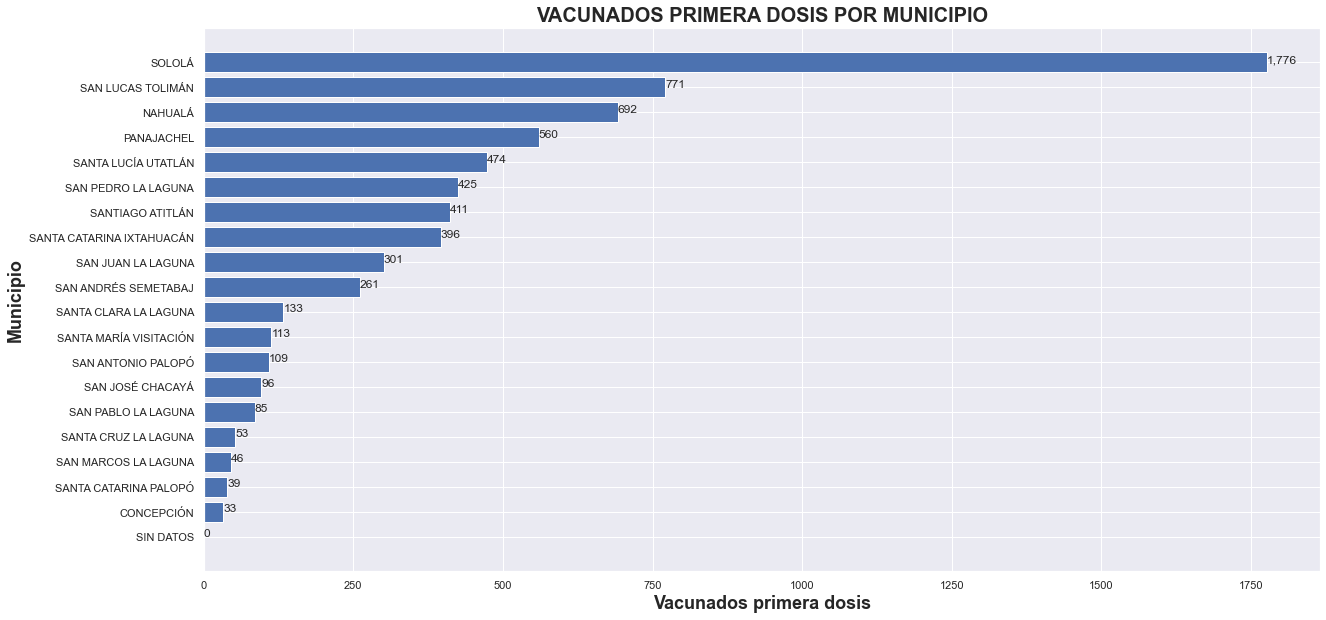

In [999]:
fig = plt.subplots(figsize=(20,10))
vacunados.sort_values('Vacunados_con_primera_dosis', inplace=True)
# casos.casos.sort_values(ascending=True)
plt.barh(vacunados.municipio, vacunados.Vacunados_con_primera_dosis)
for Y, X in enumerate(vacunados.Vacunados_con_primera_dosis):
    plt.annotate("{:,}".format(X), xy=(X,Y))

plt.xlabel("Vacunados primera dosis", fontsize=18, weight="bold")
plt.ylabel("Municipio", fontsize=18, weight="bold")
plt.title("VACUNADOS PRIMERA DOSIS POR MUNICIPIO", fontsize=20, weight="bold")

* Según la gráfica Sololá, San Lucas Tolimán, Nahualá, Panajachel poseen un rango alto de vacunación al resto de los municipios, esto denotaria  que hay municipios sea por miedo o desconocimiento que  aun no se han vacunado o por la falta de vacunas que se está dando el Ministerio de Salud. 

## Gráfica de Pie sobre los Vacunados por sexo

In [880]:
vacsexo = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/vacunados_sexo.csv")
vacunacionSexo = vacsexo[['sexo','poblacion','Dosis administradas (primera dosis)','Dosis administradas (esquema completo)']]
vacunacionSexo.head()


,sexo,poblacion,Dosis administradas (primera dosis),Dosis administradas (esquema completo)
0,Femenino,155882,3953,1289
1,Masculino,139012,2821,834
2,Total,294894,6774,2123


In [812]:
filas=len(vacunacionSexo.index)
print("Filas: ", filas)
vacunacionSexo.drop(vacunacionSexo.index[[filas-1]],inplace=True)
filas=len(vacunacionSexo.index)
print("Filas: ", filas)

Filas:  3
Filas:  2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [813]:
vacunacionSexo.head()

,sexo,poblacion,Dosis administradas (primera dosis),Dosis administradas (esquema completo)
0,Femenino,155882,3953,1289
1,Masculino,139012,2821,834


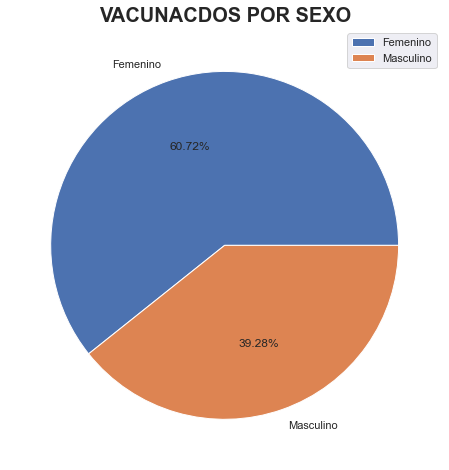

In [980]:
fig = plt.subplots(figsize=(8,8))
plt.pie(Sexo['Dosis Administradas'],
       labels=Sexo['Sexo'],autopct="%1.2f%%")
plt.title("VACUNACDOS POR SEXO", fontsize=20, weight="bold")
plt.legend()
plt.show()

* En la gráfica se examina los datos sobre la vacunación por sexo, esto dá a entender que el sexo  femenino tiene un porcentaje alto el cual rebasa  a la mitad del 100% que es un 60.72% 
* Mientas que el sexo opuesto tiende a tener un 39.28%, entonces esto significa que  hay un rango de mujeres que se preocupan por su salud en el departamento de Sololá

In [954]:
vacedad = pd.read_csv("C:/Users/Nicole/Desktop/MLpythonModelado/ProyectoFialModelado/vacunados_edad.csv")
vacedad.drop(['V1','Porcentaje_con_primera_dosis','Porcentaje_con_esquema_completo','Dosis_administradas_esquema_completo'], axis = 'columns', inplace=True)

In [955]:
filas=len(vacedad.index)
print("Filas: ", filas)
vacedad.drop(vacedad.index[[filas-1]],inplace=True)
filas=len(vacedad.index)
print("Filas: ", filas)

Filas:  7
Filas:  6


In [956]:
vacedad.head(20)

,Grupo_etario_años,poblacion,Dosis_administradas_primera_dosis
0,18 a 29 años,119624,1320
1,30 a 39 años,69824,1026
2,40 a 49 años,46115,515
3,50 a 59 años,28295,313
4,60 a 69 años,16772,616
5,70 años y más,14264,2284


Text(0.5, 1.0, 'VACUNADOS POR RANGO EDAD')

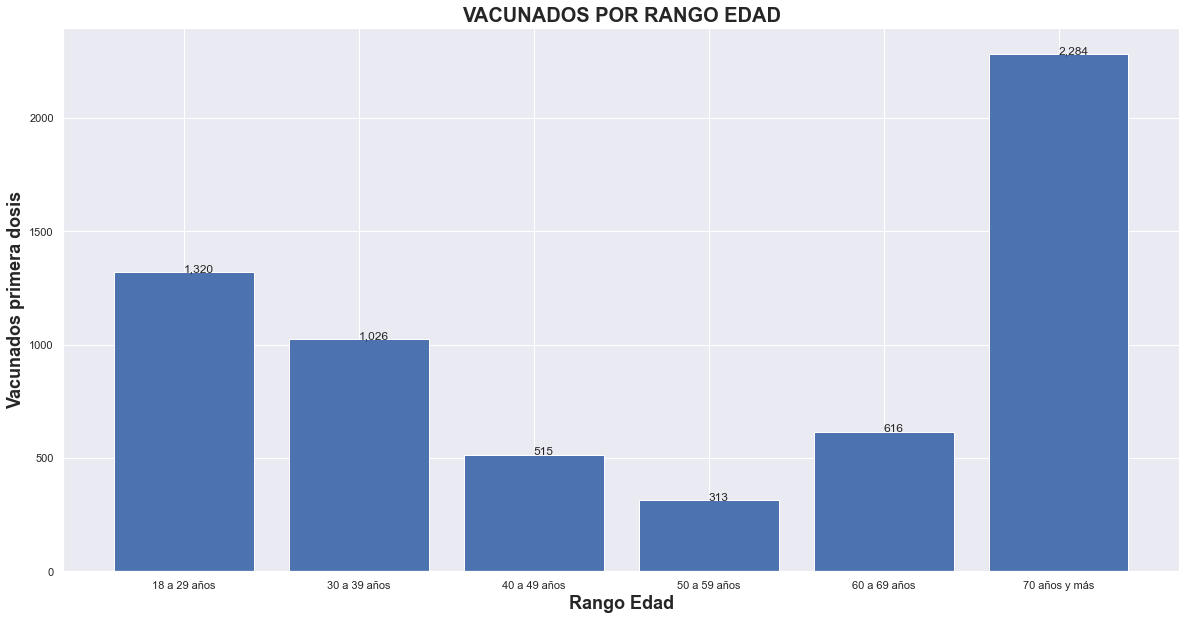

In [1019]:
fig = plt.subplots(figsize=(20,10))

plt.bar(vacedad.Grupo_etario_años,vacedad.Dosis_administradas_primera_dosis)
for X, Y in enumerate(vacedad.Dosis_administradas_primera_dosis):
    plt.annotate("{:,}".format(Y), xy=(X,Y))
    
plt.xlabel("Rango Edad", fontsize=18, weight="bold")
plt.ylabel("Vacunados primera dosis", fontsize=18, weight="bold")
plt.title("VACUNADOS POR RANGO EDAD", fontsize=20, weight="bold")

* Se visualiza el rango de edad de 70 en adelante, esta son las edades con mayor número de vacunación con un 2,284, le sigue el rango de 18 a 29 años con la cantidad de 1320

## Union de Tablas

In [881]:
DepSol=pd.concat([sintoma,casos.casos,fallecidos.fallecidos,vacunados.Vacunados_con_primera_dosis],axis=1)

In [882]:
DepSol.head(20)

,municipio,poblacion,Total_Sintoma,casos,fallecidos,Vacunados_con_primera_dosis
0,CONCEPCION,7105,2,4,0,33
1,NAHUALA,91523,182,287,18,692
2,PANAJACHEL,15840,423,534,21,560
3,SAN ANDRES SEMETABAJ,14640,84,109,9,261
4,SAN ANTONIO PALOPO,15639,13,25,2,109
5,SAN JOSE CHACAYA,5128,34,45,7,96
6,SAN JUAN LA LAGUNA,13123,71,98,3,301
7,SAN LUCAS TOLIMAN,31581,114,177,8,771
8,SAN MARCOS LA LAGUNA,2911,3,6,1,46
9,SAN PABLO LA LAGUNA,7950,4,8,0,85


In [1021]:
DepSol.describe()

,Total_Sintoma,casos,fallecidos,Vacunados_con_primera_dosis
count,20.000000,20.00000,20.000000,20.000000
mean,106.850000,154.05000,7.350000,338.700000
std,179.294605,259.58519,11.098957,410.570989
min,2.000000,4.00000,0.000000,0.000000
25%,10.000000,12.00000,0.750000,77.000000
50%,43.500000,65.50000,3.000000,197.000000
75%,115.000000,179.00000,9.250000,437.250000
max,744.000000,1111.00000,47.000000,1776.000000


* count es el número de datos contados que no están en blanco
* mean promedio o media
* std desviasión estándar
* min valor mínimo
* cuantiles 25, 50, 75
* max es el valor máximo en un datos